Text(0.5, 1.0, 'With Vertical Bounds')

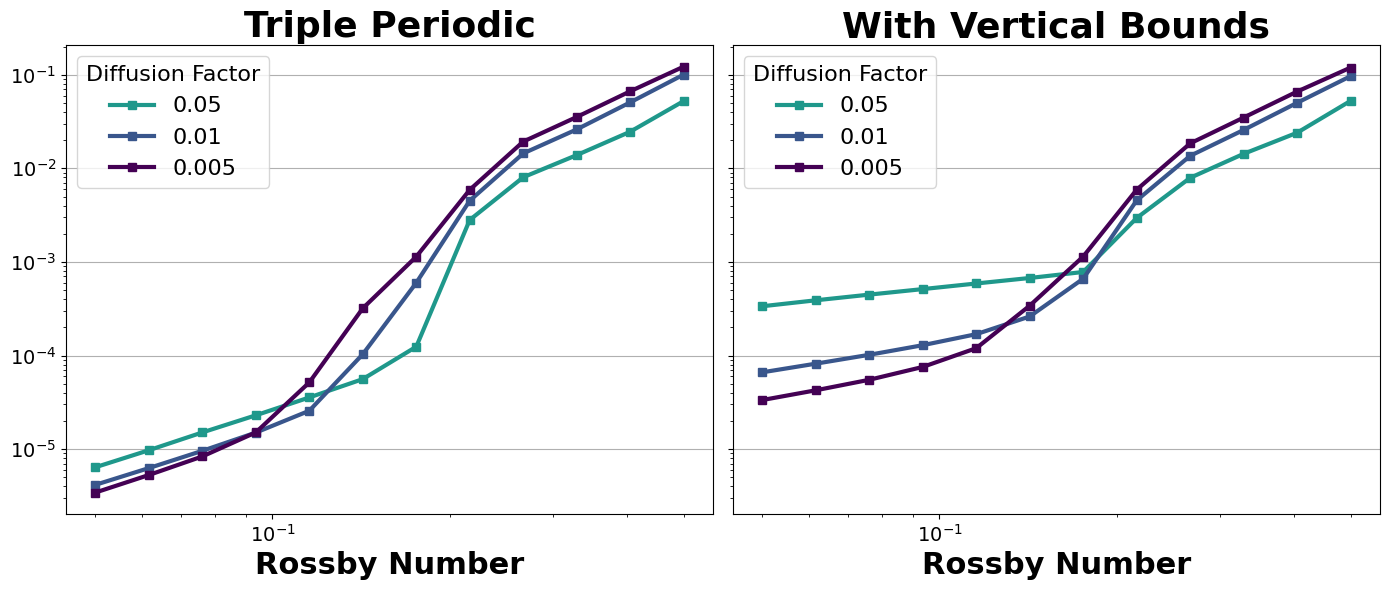

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines

ds = xr.load_dataset("../data/vertical_bounds_nh.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 1, len(ds.diffusion_fac)))

fig, axs = plt.subplots(1, 2, figsize=(14,6), tight_layout=True, sharey=True)

for ax, vb in zip(axs, ds.vertical_bounds):
    for diff_fac, col in zip(ds.diffusion_fac, colors):
        if diff_fac == 0.1:
            continue
        ds.imbalance.sel({"vertical_bounds": vb,
                          "diffusion_fac": diff_fac}).plot(
            marker="s", color=col, ax=ax, lw=3, label=f"{diff_fac:.2g}")

    # # Create inline labels
    # labelLines(ax.get_lines(), zorder=2.5, align=False,
    #         fontsize=18, outline_width=10)
    ax.legend(title="Diffusion Factor", fontsize=16, title_fontsize=16)

    ax.tick_params(labelsize=14)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.grid(axis="y")
    ax.set_xlabel("Rossby Number", fontsize=22, fontweight="bold")
    ax.set_ylabel("")

axs[0].set_title("Triple Periodic", fontsize=26, fontweight="bold")
axs[1].set_title("With Vertical Bounds", fontsize=26, fontweight="bold")

Text(0, 0.5, '')

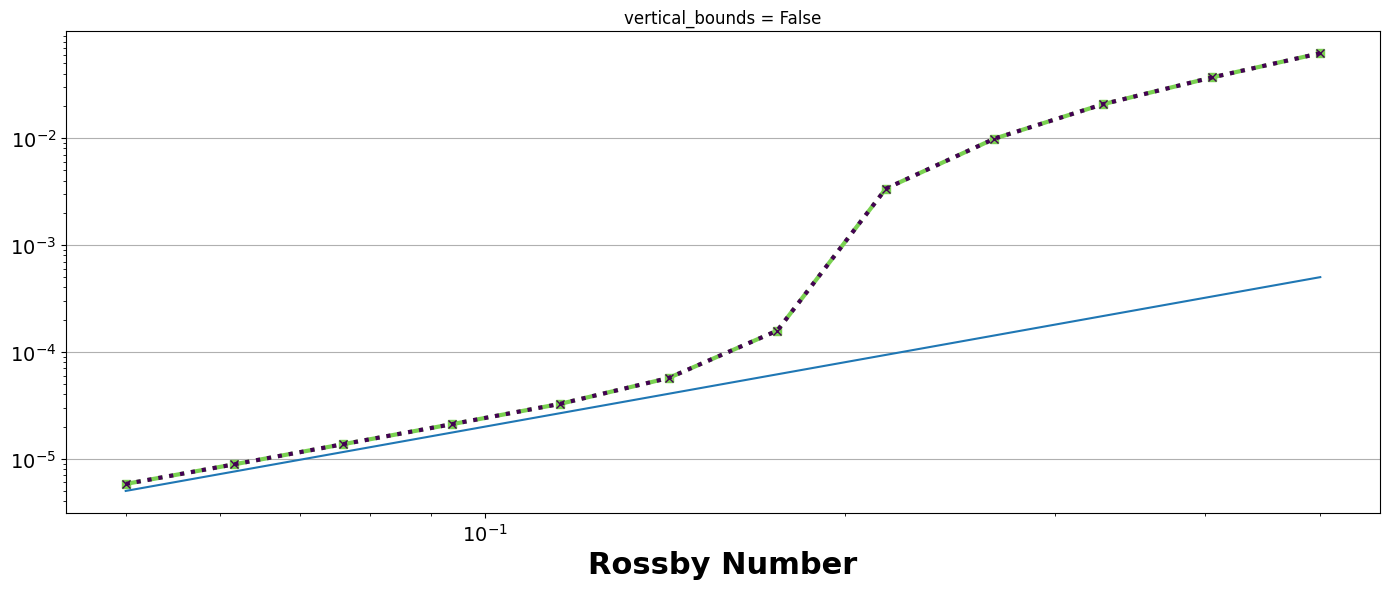

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines

ds = xr.load_dataset("../data/vertical_bounds_nh.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 1, len(ds.vertical_bounds)))

fig, ax = plt.subplots(1, 1, figsize=(14,6), tight_layout=True, sharey=True)

ds.imbalance.sel({"vertical_bounds": False}).plot(
    marker="s", color=colors[0], ax=ax, lw=3, linestyle="--")

ds.imbalance.sel({"vertical_bounds": False}).plot(
    marker="x", color=colors[1], ax=ax, lw=3, linestyle=":")

# # Create inline labels
# labelLines(ax.get_lines(), zorder=2.5, align=False,
#         fontsize=18, outline_width=10)

plt.plot(ds.rossby_number, 2e-3*ds.rossby_number**2)

ax.tick_params(labelsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(axis="y")
ax.set_xlabel("Rossby Number", fontsize=22, fontweight="bold")
ax.set_ylabel("")

In [12]:
ro = ds.rossby_number[0]
ds.imbalance.sel({"vertical_bounds": False}).sel({"rossby_number": ro})

<xarray.DataArray 'imbalance' ()> Size: 8B
array(5.81600376e-06)
Coordinates:
    vertical_bounds  bool 1B False
    rossby_number    float64 8B 0.05